In [24]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Initial Inspection

In [25]:
df.shape

(4188, 19)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

# Exploratory data analysis
## Data Preprossesing
## checking for null values

In [27]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [28]:
# Apply fillna only to numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check if null values are handled
print(df.isnull().sum())

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64


In [29]:
df.shape

(4188, 19)

## checking for duplicate entries 

In [30]:
dup=df[df.duplicated()]
dup

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND


### Reshape the data for modeling

In [31]:
state = "Orissa"
group = df.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
state_data = group.get_group(state)

In [32]:
df = state_data.melt(['YEAR']).reset_index()
df = df[['YEAR', 'variable', 'value']].reset_index().sort_values(by=['YEAR', 'index'])
df.columns = ['Index', 'Year', 'Month', 'Avg_Rainfall']

### Map month names to numbers

In [33]:
Month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
df['Month'] = df['Month'].map(Month_map)
df.drop(columns="Index", inplace=True)
df.head()

,Year,Month,Avg_Rainfall
0,1901,1,39.5
117,1901,2,65.1
234,1901,3,16.1
351,1901,4,51.6
468,1901,5,79.0


### Prepare features and labels

In [34]:
X = df[['Year', 'Month']].astype(int) 
y = df['Avg_Rainfall'].astype(int)

### Split data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
from sklearn.metrics import mean_squared_error, r2_score

## Check the accuracy using Different models

# Using linear regression model

In [36]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {linear_mse}')
print(f'R² Score: {linear_r2}')

Mean Squared Error: 17607.11825963762
R² Score: 0.07313637887318147


# using polynomial regg model

In [37]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Transform the features to polynomial features
degree = 2  # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Create a linear regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)
poly_mse = mean_squared_error(y_test, y_pred)
poly_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {poly_mse}')
print(f'R² Score: {poly_r2}')

Mean Squared Error: 10392.307390972941
R² Score: 0.45293423272216804


# Using Desision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=10)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {dt_mse}')
print(f'R² Score: {dt_r2}')

Mean Squared Error: 6363.898104265403
R² Score: 0.6649953982007886


# Using Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [40]:
y_pred=random_forest_model.predict(x_test)
from sklearn.metrics import r2_score
rf_r2=r2_score(y_test,y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f"R² Score: {rf_r2}")

Mean Squared Error: 3547.8694147804463
R² Score: 0.8132351333944996


## checking for MSE

In [41]:
# Get descriptive statistics for y_test (target variable)
desc_stats = y_test.describe()

print("Standard Deviation:", desc_stats['std'])
print("Variance:", desc_stats['std'] ** 2)

Standard Deviation: 137.9912026861757
Variance: 19041.572018777228


# plot a bar graph to compare diff models wrt their accuracy

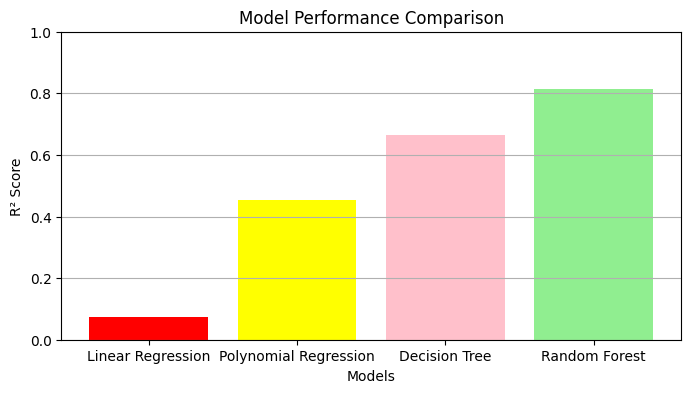

In [42]:
import matplotlib.pyplot as plt
model_scores = {
    'Linear Regression': linear_r2,
    'Polynomial Regression': poly_r2,
    'Decision Tree': dt_r2,
    'Random Forest': rf_r2
}

models = list(model_scores.keys())
scores = list(model_scores.values())

# Plotting the bar graph
plt.figure(figsize=(8, 4))
plt.bar(models, scores, color=['red', 'yellow', 'pink', 'lightgreen'])
plt.ylim(0, 1)  # Assuming R² score ranges from 0 to 1
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.grid(axis='y')
plt.show()

## The Highest R2 Score is using Random Forest Regression model  which is 81%

#### Save the trained model using joblib

In [44]:
import joblib
joblib.dump(random_forest_model, 'rainfall_model.pkl')

['rainfall_model.pkl']

In [45]:
import seaborn as sns

<Axes: >

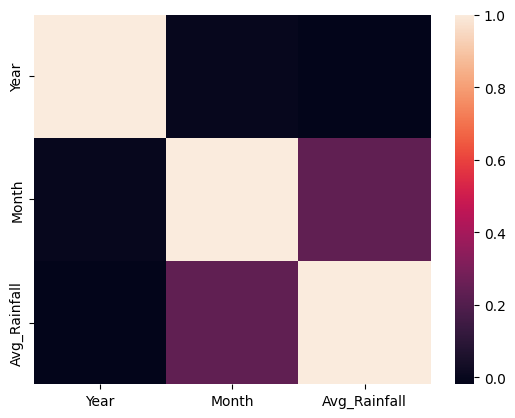

In [46]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Avg_Rainfall', ylabel='Count'>

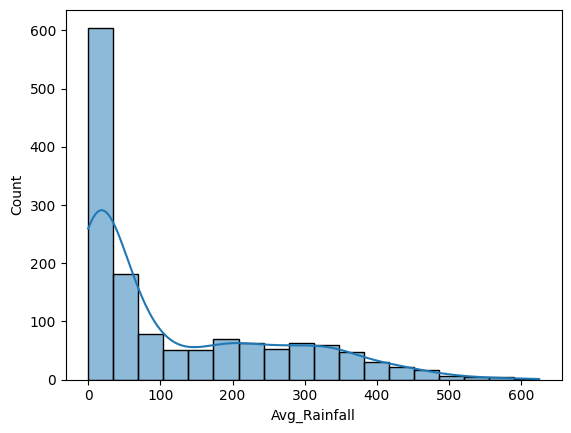

In [48]:
sns.histplot(data=df,x='Avg_Rainfall',kde='True')

<Axes: xlabel='Avg_Rainfall'>

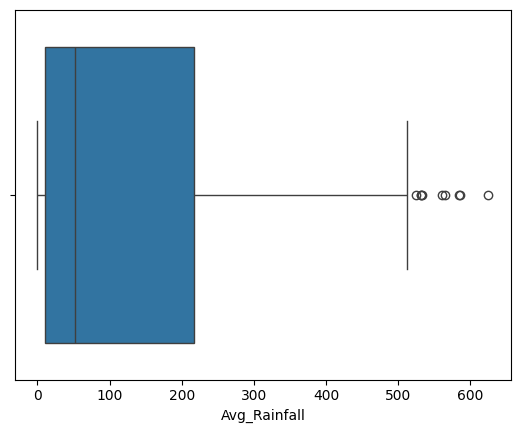

In [49]:
sns.boxplot(data=df,x='Avg_Rainfall')

<Axes: xlabel='Avg_Rainfall', ylabel='Month'>

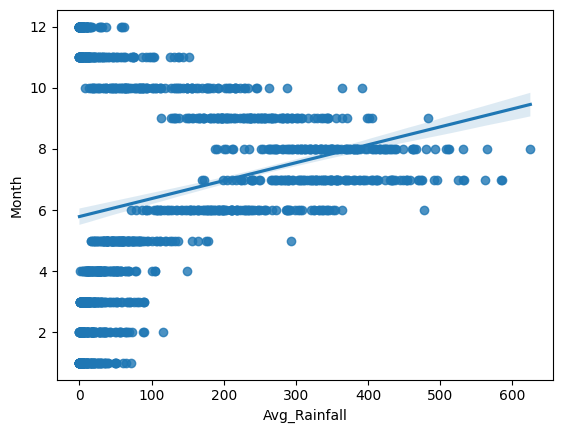

In [54]:
sns.regplot(data=df,x='Avg_Rainfall',y='Month') # uphill i.e positive corelation